In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("final_output.csv")
df.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,146,216693.256255,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,53079.0,0.707117,0.193045,0.014846,0.036000,28.131469,531.0,8.1,1.9,96.260178
1,198,339110.537918,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,60969.0,0.804666,0.077669,0.008754,0.054736,32.450286,796.0,10.9,2.0,112.985603
2,122,173013.008360,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,41531.0,0.439519,0.469809,0.004084,0.059866,11.153098,398.0,17.8,4.0,27.538003
3,129,201356.450724,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,39835.0,0.737541,0.196923,0.001166,0.033194,11.913807,286.0,8.7,2.0,35.161208
4,137,220333.454690,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,45021.0,0.841546,0.013968,0.002942,0.097592,14.903610,464.0,11.5,1.8,89.763100


In [51]:
df_2 = pd.read_csv("final_output_select.csv")
df_2.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,700,1.046831e+06,CA,Alameda,ERQK,99.936367,DRGT,98.759147,RFLD,98.122813,...,106657,0.280724,0.094807,0.321283,0.234047,49.643049,7622,10.9,3.7,2023.250513
1,343,5.847605e+05,CA,Alpine,LNDS,98.875683,WFIR,81.641744,AVLN,81.250000,...,75395,0.665282,0.008306,0.009967,0.069767,39.318885,3481,4.7,5.2,1.595862
2,267,4.450816e+05,CA,Amador,DRGT,98.663697,WFIR,97.391028,HWAV,94.336621,...,50020,0.734422,0.030019,0.013688,0.148589,19.517730,2814,14.6,5.6,66.049890
3,277,4.071031e+05,CA,Butte,DRGT,99.809100,WFIR,98.790964,ERQK,98.345530,...,56847,0.659877,0.015688,0.048825,0.189537,29.760071,2599,9.5,5.5,124.841933
4,264,4.733714e+05,CA,Calaveras,WFIR,99.427299,LNDS,99.421780,DRGT,97.900095,...,58425,0.765433,0.007374,0.015588,0.129493,19.910732,2933,6.3,4.5,43.190031


In [11]:
df.columns

Index(['price_sq', 'price', 'state', 'county', 'Risk_1_Type', 'Risk_1_Score',
       'Risk_2_Type', 'Risk_2_Score', 'Risk_3_Type', 'Risk_3_Score',
       'risk_score', 'risk_ratng', 'income', 'white_pct', 'black_pct',
       'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_paid_2022', 'tax_trend',
       'unemp_rate', 'pop_density'],
      dtype='object')

In [52]:
eda_df = df_2.drop(columns="risk_ratng")
eda_df.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,700,1.046831e+06,CA,Alameda,ERQK,99.936367,DRGT,98.759147,RFLD,98.122813,...,106657,0.280724,0.094807,0.321283,0.234047,49.643049,7622,10.9,3.7,2023.250513
1,343,5.847605e+05,CA,Alpine,LNDS,98.875683,WFIR,81.641744,AVLN,81.250000,...,75395,0.665282,0.008306,0.009967,0.069767,39.318885,3481,4.7,5.2,1.595862
2,267,4.450816e+05,CA,Amador,DRGT,98.663697,WFIR,97.391028,HWAV,94.336621,...,50020,0.734422,0.030019,0.013688,0.148589,19.517730,2814,14.6,5.6,66.049890
3,277,4.071031e+05,CA,Butte,DRGT,99.809100,WFIR,98.790964,ERQK,98.345530,...,56847,0.659877,0.015688,0.048825,0.189537,29.760071,2599,9.5,5.5,124.841933
4,264,4.733714e+05,CA,Calaveras,WFIR,99.427299,LNDS,99.421780,DRGT,97.900095,...,58425,0.765433,0.007374,0.015588,0.129493,19.910732,2933,6.3,4.5,43.190031


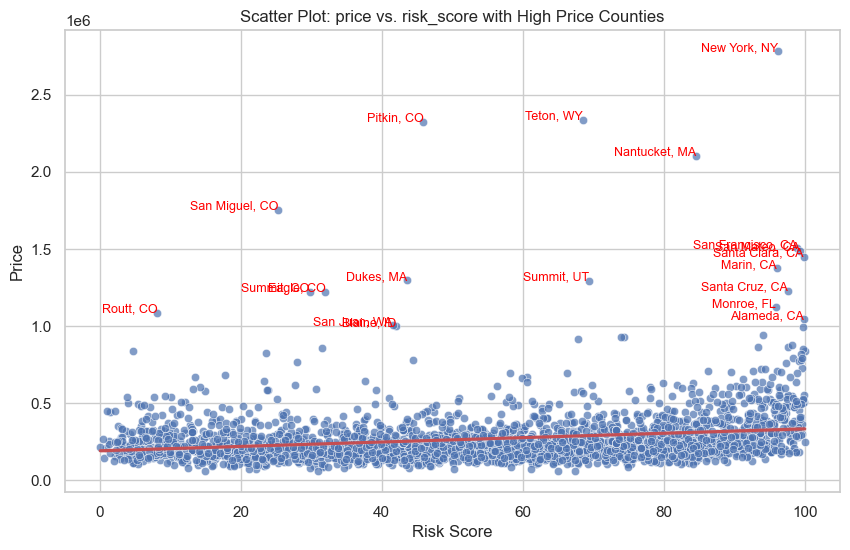

In [13]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x="risk_score", y="price", data=eda_df, alpha=0.7, color="b")

# Regression line
sns.regplot(x="risk_score", y="price", data=eda_df, scatter=False, color="r")

# Annotate high price points
high_price_points = eda_df[eda_df["price"] > 1000000]

for _, row in high_price_points.iterrows():
    plt.text(
        row["risk_score"],
        row["price"],
        f"{row['county']}, {row['state']}",
        fontsize=9,
        color="red",
        ha="right",
    )

# Plot title and labels
plt.title("Scatter Plot: price vs. risk_score with High Price Counties")
plt.xlabel("Risk Score")
plt.ylabel("Price")
plt.show()

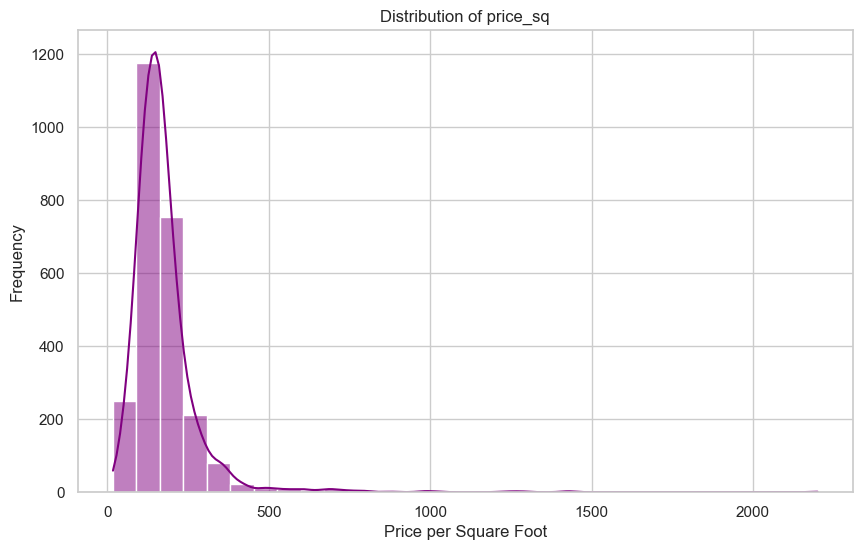

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df["price_sq"], kde=True, color="purple", bins=30)
plt.title("Distribution of price_sq")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

In [53]:
eda_df.columns

Index(['price_sq', 'price', 'state', 'county', 'Risk_1_Type', 'Risk_1_Score',
       'Risk_2_Type', 'Risk_2_Score', 'Risk_3_Type', 'Risk_3_Score',
       'risk_score', 'income', 'white_pct', 'black_pct', 'asian_pct',
       'hispanic_pct', 'ed_pct', 'tax_paid_2022', 'tax_trend', 'unemp_rate',
       'pop_density'],
      dtype='object')

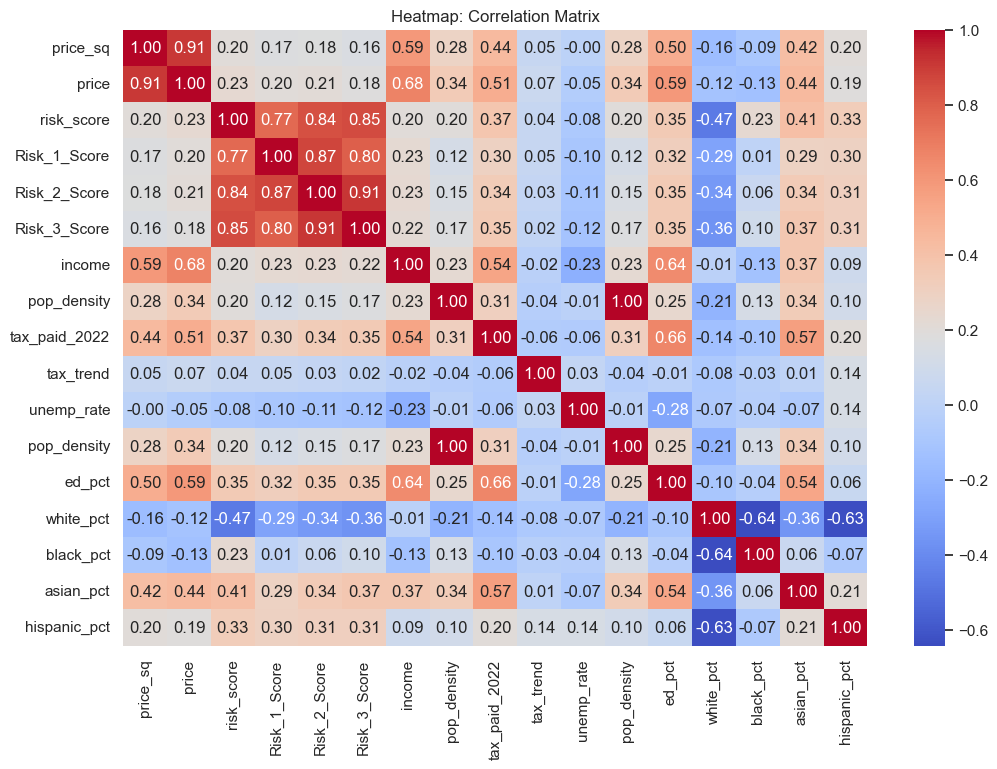

In [16]:
plt.figure(figsize=(12, 8))
corr = eda_df[
    [
        "price_sq",
        "price",
        "risk_score",
        "Risk_1_Score",
        "Risk_2_Score",
        "Risk_3_Score",
        "income",
        "pop_density",
        "tax_paid_2022",
        "tax_trend",
        "unemp_rate",
        "pop_density",
        "ed_pct",
        "white_pct",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Correlation Matrix")
plt.show()

C:\Users\atrey\AppData\Local\Temp\ipykernel_51144\2306069497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Risk_1_Type", y="price_sq", data=avg_price_by_risk, palette="Blues_d")


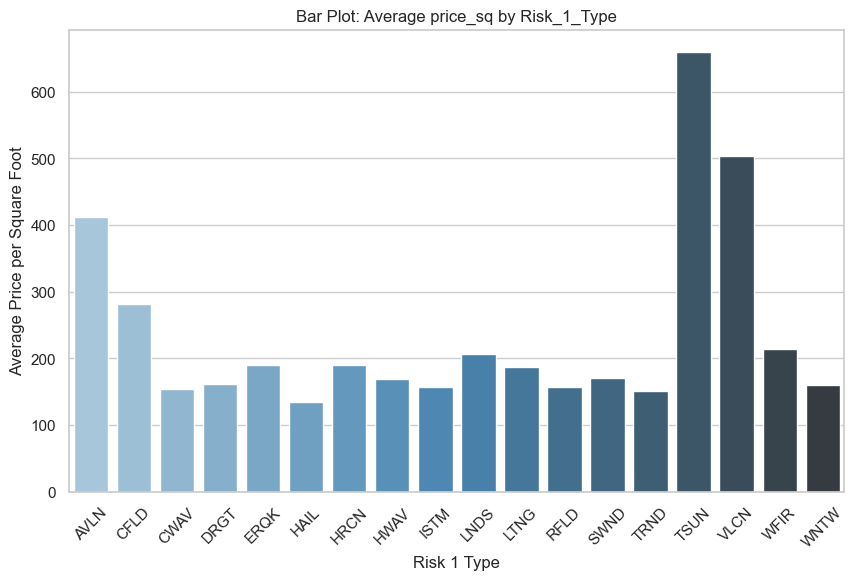

In [17]:
plt.figure(figsize=(10, 6))
avg_price_by_risk = eda_df.groupby("Risk_1_Type")["price_sq"].mean().reset_index()
sns.barplot(x="Risk_1_Type", y="price_sq", data=avg_price_by_risk, palette="Blues_d")
plt.title("Bar Plot: Average price_sq by Risk_1_Type")
plt.xlabel("Risk 1 Type")
plt.ylabel("Average Price per Square Foot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**OLS Regression**

* Check multicollinearity for risk scores

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

risk_features = ["risk_score", "Risk_1_Score", "Risk_2_Score", "Risk_3_Score"]

correlation_matrix = eda_df[risk_features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

X = sm.add_constant(eda_df[risk_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Correlation Matrix:
              risk_score  Risk_1_Score  Risk_2_Score  Risk_3_Score
risk_score      1.000000      0.765404      0.840195      0.852879
Risk_1_Score    0.765404      1.000000      0.874886      0.795666
Risk_2_Score    0.840195      0.874886      1.000000      0.914091
Risk_3_Score    0.852879      0.795666      0.914091      1.000000

Variance Inflation Factor (VIF):
        Feature         VIF
0         const  131.082397
1    risk_score    4.068484
2  Risk_1_Score    4.342676
3  Risk_2_Score    9.759303
4  Risk_3_Score    7.181967


* Check multicollinearity for demographic pct

In [21]:
import statsmodels.api as sm
racial_features = ["white_pct", "black_pct", "asian_pct", "hispanic_pct"]

correlation_matrix_racial = eda_df[racial_features].corr()
print("Correlation Matrix:")
print(correlation_matrix_racial)

X_racial = sm.add_constant(eda_df[racial_features])
vif_data_racial = pd.DataFrame()
vif_data_racial["Feature"] = X_racial.columns
vif_data_racial["VIF"] = [
    variance_inflation_factor(X_racial.values, i) for i in range(X_racial.shape[1])
]

print("\nVariance Inflation Factor (VIF):")
print(vif_data_racial)

Correlation Matrix:
              white_pct  black_pct  asian_pct  hispanic_pct
white_pct      1.000000  -0.641890  -0.357761     -0.634626
black_pct     -0.641890   1.000000   0.058992     -0.073672
asian_pct     -0.357761   0.058992   1.000000      0.212531
hispanic_pct  -0.634626  -0.073672   0.212531      1.000000


NameError: name 'variance_inflation_factor' is not defined

In [20]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------- ----------- 7.1/9.8 MB 36.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 36.1 MB/s eta 0:00:00


* PCA

In [56]:
risk_scores = eda_df[["Risk_1_Score", "Risk_2_Score", "Risk_3_Score"]]

pca = PCA(n_components=1)
eda_df["pca_risk_score"] = pca.fit_transform(risk_scores)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.9316663]


The new variable pca_risk_score can represent 91.72% of the combined variance of "Risk_1_Score", "Risk_2_Score", "Risk_3_Score"

In [124]:
risk_features_with_pca = ["pca_risk_score", "risk_score"]

correlation_matrix_pca = eda_df[risk_features_with_pca].corr()
print("Correlation Matrix:")
print(correlation_matrix_pca)

X_pca = sm.add_constant(eda_df[risk_features_with_pca])
vif_data_pca = pd.DataFrame()
vif_data_pca["Feature"] = X_pca.columns
vif_data_pca["VIF"] = [
    variance_inflation_factor(X_pca.values, i) for i in range(X_pca.shape[1])
]

print("\nVariance Inflation Factor (VIF):")
print(vif_data_pca)

Correlation Matrix:
                pca_risk_score  risk_score
pca_risk_score        1.000000    0.866865
risk_score            0.866865    1.000000

Variance Inflation Factor (VIF):
          Feature        VIF
0           const  16.319496
1  pca_risk_score   4.023402
2      risk_score   4.023402


* OLS - risk_score

In [25]:
import statsmodels.api as sm

X = eda_df[
    [
        "risk_score",
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_paid_2022",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y = eda_df["price_sq"]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.43e-315
Time:                        00:06:44   Log-Likelihood:                -14859.
No. Observations:                2539   AIC:                         2.974e+04
Df Residuals:                    2528   BIC:                         2.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -82.5823      9.649     -8.559

In [59]:
import statsmodels.api as sm

X_price = eda_df[
    [
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_paid_2022",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y_price = eda_df["price"]

# Add a constant (intercept)
X_price = sm.add_constant(X_price)

# Fit the regression model
model = sm.OLS(y_price, X_price).fit()

# Output the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     96.81
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.47e-87
Time:                        00:42:05   Log-Likelihood:                -4484.0
No. Observations:                 344   AIC:                             8988.
Df Residuals:                     334   BIC:                             9026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.136e+04   3.53e+04     -0.604

* **[among three OLS model, this one is the best] OLS - pca_risk_score** (exclude tax_paid_2o22 since it's not significant; use pca_risk_score instead of the original risk_score)

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     46.32
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.24e-53
Time:                        00:43:25   Log-Likelihood:                -2079.8
No. Observations:                 344   AIC:                             4180.
Df Residuals:                     334   BIC:                             4218.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8481     32.898     -0.

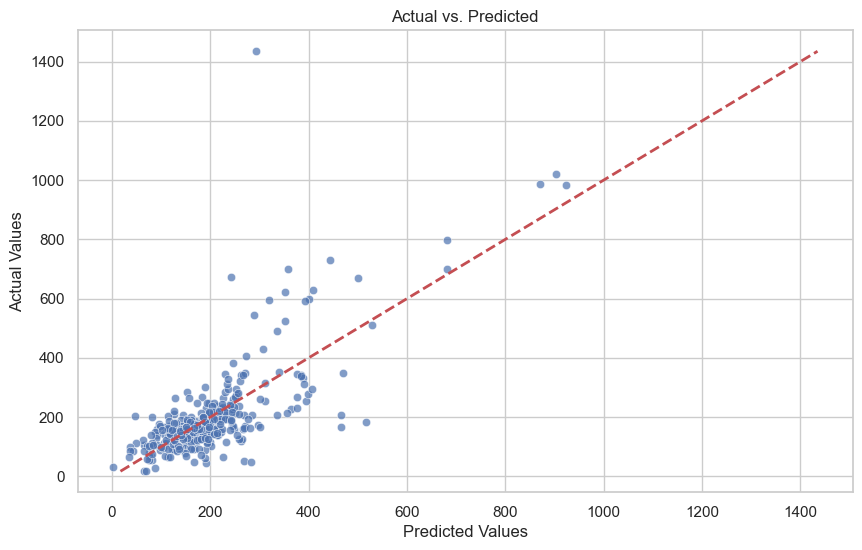

In [63]:
X = eda_df[
    [
        "pca_risk_score",
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y = eda_df["price_sq"]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the regression model
model_ols = sm.OLS(y, X).fit()

# Output the regression results
print(model_ols.summary())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.scatterplot(x=model_ols.predict(X), y=y, alpha=0.7, color="b")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)

plt.title("Actual vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Not bad not bad

**Get rid of the extreme values (we look at the extreme value for price_sq) and do the ols again**

In [127]:
# Feature selection: Select relevant features
features = [
    "pca_risk_score",
    "income",
    "black_pct",
    "asian_pct",
    "hispanic_pct",
    "ed_pct",
    "tax_trend",
    "unemp_rate",
    "pop_density",
]

# Data standardization: Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
eda_df[features] = scaler.fit_transform(eda_df[features])

# Detect outliers in price_sq
Q1 = eda_df["price_sq"].quantile(0.25)
Q3 = eda_df["price_sq"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = eda_df[
    (eda_df["price_sq"] >= lower_bound) & (eda_df["price_sq"] <= upper_bound)
]

# Perform OLS regression on the filtered dataset
X_filtered = filtered_df[features]
y_filtered = filtered_df["price_sq"]

# Add a constant (intercept)
X_filtered = sm.add_constant(X_filtered)

# Fit the OLS regression model
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

# Output the regression results
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     88.42
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.61e-142
Time:                        21:20:57   Log-Likelihood:                -12752.
No. Observations:                2403   AIC:                         2.552e+04
Df Residuals:                    2393   BIC:                         2.558e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            158.4939      1.018    155.

**It seems there's no need to get rid of the ‘extreme’ values**

**GLM**

In [64]:
X = eda_df[
    [
        "pca_risk_score",
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y = eda_df["price_sq"]

X = sm.add_constant(X)

glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               price_sq   No. Observations:                  344
Model:                            GLM   Df Residuals:                      334
Model Family:                Gaussian   Df Model:                            9
Link Function:               Identity   Scale:                          10756.
Method:                          IRLS   Log-Likelihood:                -2079.8
Date:                Mon, 09 Dec 2024   Deviance:                   3.5925e+06
Time:                        00:43:42   Pearson chi2:                 3.59e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7025
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8481     32.898     -0.

In [89]:
X_glm = eda_df[
    [
        "income",
        "black_pct",
        "hispanic_pct",
        "asian_pct",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y_glm = eda_df["price"]

X_glm = sm.add_constant(X_glm)

glm_model = sm.GLM(y_glm, X_glm, family=sm.families.Gaussian()).fit()

print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  344
Model:                            GLM   Df Residuals:                      336
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                      1.4038e+10
Method:                          IRLS   Log-Likelihood:                -4502.9
Date:                Mon, 09 Dec 2024   Deviance:                   4.7169e+12
Time:                        04:28:59   Pearson chi2:                 4.72e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8872
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.891e+04   3.52e+04     -0.822   

In [91]:
X_glm_risk = eda_df[
    [
        "risk_score",
        "income",
        "black_pct",
        "hispanic_pct",
        "asian_pct",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y_glm_risk = eda_df["price"]

X_glm_risk = sm.add_constant(X_glm_risk)

glm_model_risk = sm.GLM(y_glm_risk, X_glm_risk, family=sm.families.Gaussian()).fit()

print(glm_model_risk.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  344
Model:                            GLM   Df Residuals:                      335
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                      1.3452e+10
Method:                          IRLS   Log-Likelihood:                -4495.0
Date:                Mon, 09 Dec 2024   Deviance:                   4.5066e+12
Time:                        04:29:10   Pearson chi2:                 4.51e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9020
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.048e+05   3.94e+04     -2.659   

In [93]:
from scipy.stats import chi2

# Compare log-likelihoods
log_likelihood_simple = glm_model.llf
log_likelihood_complex = glm_model_risk.llf

# Calculate likelihood ratio statistic
lr_stat = 2 * (log_likelihood_complex - log_likelihood_simple)
df_diff = len(glm_model_risk.params) - len(glm_model.params)  # Difference in predictors
p_value = chi2.sf(lr_stat, df_diff)

print(f"Likelihood Ratio Statistic: {lr_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The complex model is significantly better than the simpler model.")
else:
    print("No significant improvement with the additional predictors.")

Likelihood Ratio Statistic: 15.690917005629672
P-value: 7.458146532090732e-05
The complex model is significantly better than the simpler model.


not much different. A little bit better (Pseudo R-squ = 0.5567) than ols (R-square = 0.45)

PYGAM Section (Generalized Additive Models)

In [38]:
!pip install pygam

In [50]:
from pygam import GAM, s, f
import numpy as np

lams = np.random.rand(100, 11)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).fit(X_glm,y_glm)

gam.summary()

(100, 11)
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     45.5835
Link Function:                     IdentityLink Log Likelihood:                                -60669.2487
Number of Samples:                         2539 AIC:                                           121431.6644
                                                AICc:                                          121433.4438
                                                GCV:                                        9830890301.126
                                                Scale:                                     9513711492.1843
                                                Pseudo R-Squared:                                   0.6756
Feature Function           

C:\Users\atrey\AppData\Local\Temp\ipykernel_51144\3619463171.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


**GLM with Risk_type_1**

* get rid of the two climate risks because not enough observations

In [ ]:
g2_df = eda_df[(eda_df["Risk_1_Type"] == "TSUN") | (eda_df["Risk_1_Type"] == "VLCN")]

g2_df

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density,pca_risk_score
443,660,940259.697540,HI,Honolulu,TSUN,100.0,WFIR,98.981864,ERQK,97.550111,...,0.172679,-0.482106,14.003429,-0.026171,1.269457,2368.0,-0.165139,-0.750413,0.140554,1.317917
2379,503,793847.386066,WA,King,VLCN,100.0,ERQK,99.809100,LNDS,97.044651,...,0.542187,-0.139960,6.295453,0.104117,3.042936,6476.0,0.397097,-0.473258,0.497168,1.325066


In [134]:
filtered_df = eda_df[~eda_df["Risk_1_Type"].isin(["TSUN", "VLCN"])]

risk_type_counts = filtered_df["Risk_1_Type"].value_counts()

risk_type_counts

Risk_1_Type
LNDS    263
HAIL    255
DRGT    237
ISTM    226
CWAV    217
WFIR    193
SWND    189
HRCN    182
ERQK    168
RFLD    154
WNTW    129
HWAV    115
LTNG     99
TRND     84
CFLD     14
AVLN     12
Name: count, dtype: int64

In [132]:
filtered_df

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density,pca_risk_score
0,146,2.166933e+05,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,0.707117,0.809554,-0.003909,-0.465715,0.462949,531.0,-0.024580,-1.304722,-0.116102,-0.589461
1,198,3.391105e+05,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,0.804666,-0.046907,-0.213240,-0.315500,0.893244,796.0,0.537656,-1.235433,-0.104405,1.148206
2,122,1.730130e+05,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,0.439519,2.864031,-0.373761,-0.274370,-1.228652,398.0,1.923164,0.150339,-0.164164,-0.197403
3,129,2.013565e+05,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,0.737541,0.838341,-0.474017,-0.488213,-1.152860,286.0,0.095899,-1.235433,-0.158832,-1.272003
4,137,2.203335e+05,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,0.841546,-0.519767,-0.412977,0.028102,-0.854978,464.0,0.658135,-1.374010,-0.120646,0.215372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,144,2.761582e+05,WY,Sweetwater,CWAV,73.560293,WFIR,62.360802,ERQK,57.842825,...,0.765566,-0.561818,-0.284026,0.565161,-0.407816,1411.0,-0.406097,0.358205,-0.180635,-1.496277
2535,1229,2.334408e+06,WY,Teton,AVLN,100.000000,LNDS,92.547382,ERQK,91.059497,...,0.803823,-0.607866,-0.058946,0.377961,3.425729,4723.0,0.055740,-1.027567,-0.179606,0.934152
2536,146,2.883248e+05,WY,Uinta,WFIR,85.968820,ERQK,77.919185,WNTW,69.646834,...,0.853007,-0.605306,-0.332604,0.024277,-0.550949,1317.0,0.477416,0.011762,-0.176655,-0.436023
2537,115,2.509363e+05,WY,Washakie,WFIR,56.761056,CWAV,46.516067,ERQK,43.175310,...,0.815615,-0.611865,-0.366527,0.361957,0.267156,1317.0,-1.470328,0.843225,-0.181057,-2.744835


In [137]:
from sklearn.model_selection import train_test_split

df_dummy = pd.get_dummies(filtered_df, columns=["Risk_1_Type"], drop_first=True)

X = df_dummy[
    [
        "pca_risk_score",
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
    + [col for col in df_dummy.columns if "Risk_1_Type_" in col]
]
y = filtered_df["price_sq"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train_const = sm.add_constant(X_train)

family = sm.families.Gaussian()
model = sm.GLM(y_train, X_train_const, family=family).fit()

print(model.summary())

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               price_sq   No. Observations:                 2029
Model:                            GLM   Df Residuals:                     2004
Model Family:                Gaussian   Df Model:                           24
Link Function:               Identity   Scale:                          6786.4
Method:                          IRLS   Log-Likelihood:                -11817.
Date:                Sun, 08 Dec 2024   Deviance:                   1.3600e+07
Time:                        21:25:20   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6247
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.2719      1.830     95.206      0.0

In [ ]:
# Xi - variable
print(X.columns.tolist())

['pca_risk_score', 'income', 'black_pct', 'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_trend', 'unemp_rate', 'pop_density', 'Risk_1_Type_CFLD', 'Risk_1_Type_CWAV', 'Risk_1_Type_DRGT', 'Risk_1_Type_ERQK', 'Risk_1_Type_HAIL', 'Risk_1_Type_HRCN', 'Risk_1_Type_HWAV', 'Risk_1_Type_ISTM', 'Risk_1_Type_LNDS', 'Risk_1_Type_LTNG', 'Risk_1_Type_RFLD', 'Risk_1_Type_SWND', 'Risk_1_Type_TRND', 'Risk_1_Type_WFIR', 'Risk_1_Type_WNTW']


### Summary and Key Findings of GLM with categorical variable

**Positive Factors**:  
Income level (`income`), education level (`ed_pct`), population density (`pop_density`), Asian population percentage (`asian_pct`), and tax trend (`tax_trend`) are significant positive drivers of house prices.

**Negative Factors**:  
Risk score (`pca_risk_score`) and certain natural disaster types (e.g., cold wave, drought, hail, heatwave, storm surge, lightning, river flooding, strong wind, tornado, and winter storm) have a significant negative impact on house prices.

**No Significant Impact**:  
Black population percentage (`black_pct`), hurricane (`Risk_1_Type_HRCN`), landslide (`Risk_1_Type_LNDS`), and wildfire (`Risk_1_Type_WFIR`) do not show a significant impact on house prices.

A little better than the original GLM model

### if we want to predict better - random forest

In [139]:
filtered_df

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density,pca_risk_score
0,146,2.166933e+05,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,0.707117,0.809554,-0.003909,-0.465715,0.462949,531.0,-0.024580,-1.304722,-0.116102,-0.589461
1,198,3.391105e+05,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,0.804666,-0.046907,-0.213240,-0.315500,0.893244,796.0,0.537656,-1.235433,-0.104405,1.148206
2,122,1.730130e+05,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,0.439519,2.864031,-0.373761,-0.274370,-1.228652,398.0,1.923164,0.150339,-0.164164,-0.197403
3,129,2.013565e+05,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,0.737541,0.838341,-0.474017,-0.488213,-1.152860,286.0,0.095899,-1.235433,-0.158832,-1.272003
4,137,2.203335e+05,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,0.841546,-0.519767,-0.412977,0.028102,-0.854978,464.0,0.658135,-1.374010,-0.120646,0.215372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,144,2.761582e+05,WY,Sweetwater,CWAV,73.560293,WFIR,62.360802,ERQK,57.842825,...,0.765566,-0.561818,-0.284026,0.565161,-0.407816,1411.0,-0.406097,0.358205,-0.180635,-1.496277
2535,1229,2.334408e+06,WY,Teton,AVLN,100.000000,LNDS,92.547382,ERQK,91.059497,...,0.803823,-0.607866,-0.058946,0.377961,3.425729,4723.0,0.055740,-1.027567,-0.179606,0.934152
2536,146,2.883248e+05,WY,Uinta,WFIR,85.968820,ERQK,77.919185,WNTW,69.646834,...,0.853007,-0.605306,-0.332604,0.024277,-0.550949,1317.0,0.477416,0.011762,-0.176655,-0.436023
2537,115,2.509363e+05,WY,Washakie,WFIR,56.761056,CWAV,46.516067,ERQK,43.175310,...,0.815615,-0.611865,-0.366527,0.361957,0.267156,1317.0,-1.470328,0.843225,-0.181057,-2.744835


In [ ]:
filtered_df_encoded = pd.get_dummies(
    filtered_df, columns=["Risk_1_Type"], drop_first=True
)

X = filtered_df_encoded[
    [
        "pca_risk_score",
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
    + [col for col in filtered_df_encoded.columns if "Risk_1_Type_" in col]
]
y = filtered_df_encoded["price_sq"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

Train RMSE: 27.12135413513148
Test RMSE: 69.87955787396925
Train R^2: 0.9449151411404355
Test R^2: 0.5118528743277301


C:\Users\xiaoz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\xiaoz\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


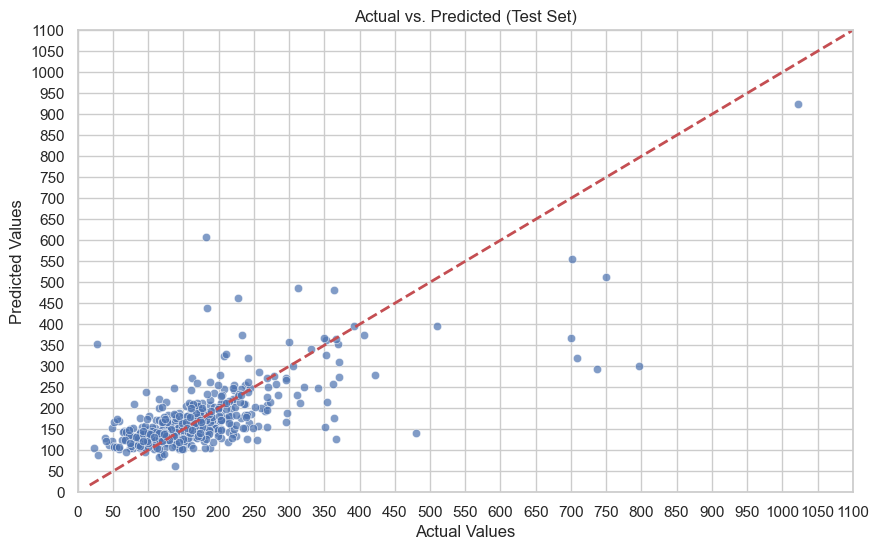

In [ ]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, color="b")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)

plt.xlim([0, 1100])
plt.ylim([0, 1100])

plt.xticks(range(0, 1101, 50))
plt.yticks(range(0, 1101, 50))

plt.title("Actual vs. Predicted (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Interpretation
1. **Training vs. Test Performance**:
   - **Training**: High R^2 (0.94) and low RMSE (27.12) indicate excellent fit on the training set.
   - **Testing**: Lower R^2 (0.51) and higher RMSE (69.88) suggest poorer fit on the test set.

2. **Overfitting**:
   - The discrepancy between training and test performance suggests overfitting. The model performs well on training data but poorly on unseen data.

3. **Improvement Suggestions**:
   - **Feature Selection/Engineering**: Refine features to reduce noise.
   - **Model Tuning**: Adjust Random Forest hyperparameters (e.g., number of trees, depth).
   - **Cross-Validation**: Use cross-validation to ensure model stability.
   - **Ensemble Methods**: Combine with other models (e.g., Gradient Boosting, XGBoost) for better performance.